# 転職者向け　ケーススタディコース

## Day1: Online Retail
https://archive.ics.uci.edu/ml/datasets/Online+Retail

ver1.0<br>
copyright 2019 DataMix Co., Ltd.

## 0. ライブラリのインポート

もしimportできないライブラリがあったら、pip installにてライブラリをダウンロードしましょう

In [9]:
#!pip install pymysql

In [1]:
import pandas as pd
import numpy as np
import pymysql
import pandas.io.sql as psql
import matplotlib.pyplot as plt
import scipy.spatial as sp
import time

## 1. データの読み込み

### データベースへ接続

In [2]:
con = pymysql.connect(
    host='datamix-school-material.csbsmnjyxb52.ap-northeast-1.rds.amazonaws.com',
    user='user1',
    password='user1',
    db='online_retail',
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor)
con

### 【演習1】SQLによるデータ抽出
<b>各顧客（CustomerID）に対して、それぞれの商品（StockCode）を、何個（Quantity）卸したのかを集計してみましょう！</b>

- 必要なカラムはなにか？
- 除外しておいた方が良いデータはないか？

In [3]:
sql = """
SELECT
CustomerID,
StockCode,
MAX(Description) as description,
sum(Quantity) as quantity
from online_retail.sales_log as sales_log
where Quantity > 0
and Quantity < 5000
and UnitPrice > 0
and CustomerID > 0 
group by CustomerID, StockCode
"""

In [4]:
data = psql.read_sql(con=con, sql=sql)

In [5]:
data.head()

,CustomerID,StockCode,description,quantity
0,12347,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24.0
1,12347,17021,NAMASTE SWAGAT INCENSE,36.0
2,12347,20665,RED RETROSPOT PURSE,6.0
3,12347,20719,WOODLAND CHARLOTTE BAG,10.0
4,12347,20780,BLACK EAR MUFF HEADPHONES,12.0


In [6]:
data.shape

(128405, 4)

## 2. 顧客ID×商品コードのテーブルを作成

### 【演習2】Pandasを使ったデータ加工
<b>Pandasを使って、顧客ID（CustomerID）×商品コード（StockCode）のテーブルを作成しましょう</b>

- Pandasのどの関数を使ったら良いか？
- テーブルにおける、行・列・行列内の値、は何を指定すれば良いか？

In [7]:
customer_stock_matrix =  pd.pivot_table(data, index = "CustomerID", columns= "description", values = "quantity", aggfunc= sum ).fillna(0)

In [8]:
customer_stock_matrix.head(50)

description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
customer_stock_matrix.shape

(2930, 3352)

## 3. レコメンデーション用の関数を作成

### 【演習3】レコメンドする関数を作成しましょう

<b>ある顧客に対して、新たな商品をレコメンデーションする関数を完成させましょう</b>

- 準備(Pandas Dataframeから、index, columns, 行列を取得しておく)

In [21]:
stock_list = customer_stock_matrix.columns
customer_list = customer_stock_matrix.index
customer_stock_matrix_array = np.array(customer_stock_matrix)

print('description of each stock: \n', stock_list[0:5])
print('\ncustomer id: \n', customer_list[0:5])
print('\ncustomer id - stock description matrix: \n', customer_stock_matrix_array[0:5])

description of each stock: 
 Index(['10 COLOUR SPACEBOY PEN', '12 COLOURED PARTY BALLOONS',
       '12 DAISY PEGS IN WOOD BOX', '12 EGG HOUSE PAINTED WOOD',
       '12 IVORY ROSE PEG PLACE SETTINGS'],
      dtype='object', name='description')

customer id: 
 Index(['12347', '12348', '12350', '12352', '12353'], dtype='object', name='CustomerID')

customer id - stock description matrix: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


- あるレコメンドしたい顧客IDを引数とした際に、顧客リスト（customer_list）から、レコメンドしたい顧客のindexを取り出す関数

In [22]:
def get_customer_list_index(customer_list, target_customer_id):
    for index in range(len(customer_list)):
        if customer_list[index] == target_customer_id:
            target_customer_index = index
    return target_customer_index

In [23]:
# サンプル
target_customer_id = "12350"
target_customer_index = get_customer_list_index(customer_list, target_customer_id)
target_customer_index

2

- 二つのベクトルのコサイン類似度を計算する関数

In [24]:
def get_cosine_similarity(x, y):  
    # cosine類似度　= 1 - cosine距離
    return 1- sp.distance.cosine(x, y)

In [25]:
# サンプル
x = [0.1, 0.5, 0.9, 0]
y = [0, 0.35, 0.65, 1]
get_cosine_similarity(x, y)

0.591095239322405

- レコメンドしたい顧客と、全顧客との類似度を計算する関数

In [26]:
def get_user_similarity(customer_stock_matrix_array, target_customer_index):
    user_similarity = []
    target_user_row = customer_stock_matrix_array[target_customer_index]

    for row in customer_stock_matrix_array:
        similarity = get_cosine_similarity(target_user_row, row)
        user_similarity.append(similarity)

    user_similarity = np.array(user_similarity)
    return user_similarity

In [27]:
user_similarity = get_user_similarity(customer_stock_matrix_array, target_customer_index)
user_similarity

array([1.96262401e-02, 3.11873361e-04, 1.00000000e+00, ...,
       0.00000000e+00, 3.62434984e-02, 0.00000000e+00])

- レコメンドしたい顧客に対してコサイン類似度の高いユーザーTopN人を対象に、商品の平均類似度を計算する関数

In [28]:
def get_average_score_of_item(user_similarity, customer_stock_matrix_array, user_top_N):
    # TopN人の類似度と購入数量行列を取得
    idx = user_similarity.argsort()[::-1][1:user_top_N+1]
    selected_user_similarity = user_similarity[idx]
    selected_matrix = customer_stock_matrix_array[idx]
    
    # ユーザーTopN人を対象に、商品ごとの平均類似度を計算
    avg_score = []
    for col_idx in range(selected_matrix.shape[1]):
        weight_score = sum(selected_matrix[:, col_idx] * selected_user_similarity)
        similarity_sum = sum(selected_user_similarity[selected_user_similarity > 0])
        avg_score.append(weight_score / similarity_sum)
    avg_score = np.array(avg_score)
    return avg_score

In [29]:
average_score_of_item = get_average_score_of_item(user_similarity, customer_stock_matrix_array, user_top_N=20)
average_score_of_item

array([1.85496351, 0.19945943, 0.        , ..., 1.32397413, 0.        ,
       0.        ])

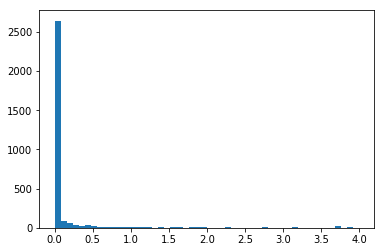

In [30]:
# 商品の平均類似度のヒストグラム
import matplotlib.pyplot as plt
plt.hist(average_score_of_item, bins=50, range=(0, 4))
plt.show()

-  レコメンドする必要がない、既に購入済の商品リストを抽出

In [31]:
already_ordered_product = stock_list[np.where(customer_stock_matrix[customer_stock_matrix.index == target_customer_id])[1]]
already_ordered_product

Index(['4 TRADITIONAL SPINNING TOPS', 'BATHROOM METAL SIGN ',
       'BLUE POLKADOT LUGGAGE TAG ', 'BLUE POLKADOT PASSPORT COVER',
       'CHOCOLATE CALCULATOR', 'CHOCOLATE THIS WAY METAL SIGN',
       'METAL SIGN NEIGHBOURHOOD WITCH ', 'PINK/PURPLE RETRO RADIO',
       'PLASTERS IN TIN SPACEBOY', 'PLASTERS IN TIN VINTAGE PAISLEY ',
       'POSTAGE', 'RED  HARMONICA IN BOX ', 'RETRO MOD TRAY',
       'RETRO PLASTIC ELEPHANT TRAY', 'TEA BAG PLATE RED RETROSPOT',
       'UNION JACK FLAG LUGGAGE TAG', 'UNION JACK FLAG PASSPORT COVER '],
      dtype='object', name='description')

- 平均類度の高い上位N商品をオススメとして表示する関数

In [32]:
def print_recommendation_items(stock_list, average_score_of_item, already_ordered_product, recommend_top_N):
    counter = 0
    print("■レコメンド商品リスト:")
    for recommended_product in stock_list[average_score_of_item.argsort()[::-1]]:
        if recommended_product not in already_ordered_product:
            print(counter+1,recommended_product)
            counter += 1
            if recommend_top_N <= counter:
                break

In [33]:
print_recommendation_items(stock_list, average_score_of_item, already_ordered_product, recommend_top_N=10)

■レコメンド商品リスト:
1 MINI PAINT SET VINTAGE 
2 HOMEMADE JAM SCENTED CANDLES
3 DOLLY GIRL LUNCH BOX
4 SET/20 RED RETROSPOT PAPER NAPKINS 
5 SPACEBOY LUNCH BOX 
6 ASSORTED COLOURS SILK FAN
7 SET OF 72 RETROSPOT PAPER  DOILIES
8 KEY FOB , SHED
9 KEY FOB , FRONT  DOOR 
10 KEY FOB , GARAGE DESIGN


### 【演習3】レコメンドをする関数を作成しましょう

<b>上記関数やコードをまとめて、ある顧客に対して、新たな商品をレコメンデーションする1つの関数を完成させ、実際に関数を実行させましょう</b>

(目安時間: 20分)

In [34]:
def recommend(target_customer_id, customer_stock_matrix, user_top_N, recommend_top_N):
    stock_list = customer_stock_matrix.columns
    customer_list = customer_stock_matrix.index
    customer_stock_matrix_array = np.array(customer_stock_matrix)

    for index in range(len(customer_list)):
        if customer_list[index] == target_customer_id:
            target_customer_index = index
            
    user_similarity = []
    target_user_row = customer_stock_matrix_array[target_customer_index]

    for row in customer_stock_matrix_array:
        similarity = 1- sp.distance.cosine(target_user_row, row)
        user_similarity.append(similarity)
    user_similarity = np.array(user_similarity)

    # TopN人の類似度と購入数量行列を取得
    idx = user_similarity.argsort()[::-1][1:user_top_N+1]
    selected_user_similarity = user_similarity[idx]
    selected_matrix = customer_stock_matrix_array[idx]
    
    # ユーザーTopN人を対象に、商品ごとの平均類似度を計算
    avg_score = []
    for col_idx in range(selected_matrix.shape[1]):
        weight_score = sum(selected_matrix[:, col_idx] * selected_user_similarity)
        similarity_sum = sum(selected_user_similarity[selected_user_similarity > 0])
        avg_score.append(weight_score / similarity_sum)
    average_score_of_item = np.array(avg_score)
    
    already_ordered_product = stock_list[np.where(customer_stock_matrix[customer_stock_matrix.index == target_customer_id])[1]]

    counter = 0
    print("■レコメンド商品リスト:")
    for recommended_product in stock_list[average_score_of_item.argsort()[::-1]]:
        if recommended_product not in already_ordered_product:
            print(counter+1,recommended_product)
            counter += 1
            if recommend_top_N <= counter:
                break

In [35]:
# 関数を実行させましょう (Enter your code)
recommend("12350", customer_stock_matrix, 20, 15)

■レコメンド商品リスト:
1 MINI PAINT SET VINTAGE 
2 HOMEMADE JAM SCENTED CANDLES
3 DOLLY GIRL LUNCH BOX
4 SET/20 RED RETROSPOT PAPER NAPKINS 
5 SPACEBOY LUNCH BOX 
6 ASSORTED COLOURS SILK FAN
7 SET OF 72 RETROSPOT PAPER  DOILIES
8 KEY FOB , SHED
9 KEY FOB , FRONT  DOOR 
10 KEY FOB , GARAGE DESIGN
11 PACK OF 72 RETROSPOT CAKE CASES
12 PACK OF 60 PINK PAISLEY CAKE CASES
13 SET OF 4 PANTRY JELLY MOULDS
14 BLUE HARMONICA IN BOX 
15 SET/6 RED SPOTTY PAPER CUPS


# 追加演習：次元削減手法の実装
## SVD : Singular Value Decomposition
### 特異値分解の理解
<b>上記recommend def に次元削減手法を取り入れます。
    （ただし、scikitやnumpyのsvdは使わず）</b>
#C = UΣV^T
#参考：　2017-12-14  Pythonで特異値分解(SVD)を理解する
#https://ohke.hateblo.jp/entry/2017/12/14/230500

In [36]:
customer_stock_matrix.head()

description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# 分解する行列
c = np.array(customer_stock_matrix)

In [39]:
c = np.array(customer_stock_matrix)
k = 2

ctc = np.dot(c.T, c)
eigen_values, eigen_vectors = np.linalg.eig(ctc)
singular_values = np.sqrt(eigen_values)
singular_index = np.argsort(singular_values)[::-1]
sigma = np.diag(singular_values[singular_index])
v = eigen_vectors[:,singular_index]
u = np.array([np.dot(c, v[:,i]) / sigma.diagonal()[i] for i in range(len(sigma.diagonal()))]).T

u_k = np.delete(u, range(k, u.shape[1]), axis=1)
sigma_k = np.delete(sigma, range(k, sigma.shape[0]), axis=0)
sigma_k = np.delete(sigma_k, range(k, sigma.shape[1]), axis=1)
v_k = np.delete(v, range(k, v.shape[1]), axis=1)
c_k = u_k.dot(sigma_k.dot(v_k.T))


In [40]:
# 特異値行列Σ(sigma) → 右特異行列V(v) → 左特異行列U(u) の順に求める
# C^TCの固有値と固有ベクトルの計算
ctc = np.dot(c.T, c)
# c.T * c 内積
eigen_values, eigen_vectors = np.linalg.eig(ctc)
#　　　eigen = 固有　　linalg.eig ->固有値・固有ベクトルの算出

In [41]:
# 特異値の計算
singular_values = np.sqrt(eigen_values)
singular_index = np.argsort(singular_values)[::-1]
## argsort は　並べ替えたインデックスのndarrayを返す。[::-1]は各軸にスライスしており、降順となる

In [42]:
# 特異値行列の計算
sigma = np.diag(singular_values[singular_index])
# np.diag は斜めのやつ（対各項）を取得

In [43]:
# 右特異行列の計算
v = eigen_vectors[:,singular_index]

In [44]:
# 左特異行列の計算　←重い
u = np.array([np.dot(c, v[:,i]) / sigma.diagonal()[i] for i in range(len(sigma.diagonal()))]).T

In [45]:
#kを仮定
k = 2

In [46]:
# U_kの計算(k列目以降を削除)
u_k = np.delete(u, range(k, u.shape[1]), axis=1)

In [47]:
# Σ_kの計算(k×k行列にする)
sigma_k = np.delete(sigma, range(k, sigma.shape[0]), axis=0)
sigma_k = np.delete(sigma_k, range(k, sigma.shape[1]), axis=1)

In [48]:
# V_kの計算(k列目以降を削除
v_k = np.delete(v, range(k, v.shape[1]), axis=1)
v_k

array([[8.91398171e-04+0.j, 6.67849173e-03+0.j],
       [1.92346910e-04+0.j, 2.82446192e-04+0.j],
       [1.09780845e-04+0.j, 1.71338944e-04+0.j],
       ...,
       [9.44999336e-05+0.j, 2.62597857e-04+0.j],
       [2.44988748e-09+0.j, 2.68758305e-08+0.j],
       [8.48910220e-06+0.j, 7.91754715e-05+0.j]])

In [49]:
c_k = u_k.dot(sigma_k.dot(v_k.T))
c_k

array([[6.69769978e-02+0.j, 3.50007310e-03+0.j, 2.09344355e-03+0.j, ...,
        2.89012869e-03+0.j, 2.64622454e-07+0.j, 7.85059923e-04+0.j],
       [1.74788033e-01+0.j, 9.55552639e-03+0.j, 5.70007369e-03+0.j, ...,
        7.70431672e-03+0.j, 6.87478302e-07+0.j, 2.04308403e-03+0.j],
       [8.55758403e-03+0.j, 7.89365279e-04+0.j, 4.59772637e-04+0.j, ...,
        5.00804683e-04+0.j, 3.12942063e-08+0.j, 9.57071559e-05+0.j],
       ...,
       [2.72757445e-03+0.j, 1.21855514e-04+0.j, 7.36304772e-05+0.j, ...,
        1.09747248e-04+0.j, 1.09285939e-08+0.j, 3.22488075e-05+0.j],
       [9.66599858e-02+0.j, 4.29401546e-03+0.j, 2.59566057e-03+0.j, ...,
        3.87988606e-03+0.j, 3.87467098e-07+0.j, 1.14316239e-03+0.j],
       [2.84369319e-03+0.j, 1.34664720e-04+0.j, 8.10483774e-05+0.j, ...,
        1.17349325e-04+0.j, 1.13377975e-08+0.j, 3.35192647e-05+0.j]])

In [55]:
def recommend_SVD(target_customer_id, customer_stock_matrix, user_top_N, recommend_top_N):
    stock_list = customer_stock_matrix.columns
    customer_list = customer_stock_matrix.index
    customer_stock_matrix_array = v_k   #np.array(customer_stock_matrix)

    for index in range(len(customer_list)):
        if customer_list[index] == target_customer_id:
            target_customer_index = index
            
    user_similarity = []
    target_user_row = customer_stock_matrix_array[target_customer_index]

    for row in customer_stock_matrix_array:
        similarity = 1- sp.distance.cosine(target_user_row, row)
        user_similarity.append(similarity)
    user_similarity = np.array(user_similarity)

    # TopN人の類似度と購入数量行列を取得
    idx = user_similarity.argsort()[::-1][1:user_top_N+1]
    selected_user_similarity = user_similarity[idx]
    selected_matrix = customer_stock_matrix_array[idx]
    
    # ユーザーTopN人を対象に、商品ごとの平均類似度を計算
    avg_score = []
    for col_idx in range(selected_matrix.shape[1]):
        weight_score = sum(selected_matrix[:, col_idx] * selected_user_similarity)
        similarity_sum = sum(selected_user_similarity[selected_user_similarity > 0])
        avg_score.append(weight_score / similarity_sum)
    average_score_of_item = np.array(avg_score)

   
    already_ordered_product = stock_list[np.where(customer_stock_matrix[customer_stock_matrix.index == target_customer_id])[1]]

    counter = 0
    print("■レコメンド商品リスト:")
    for recommended_product in stock_list[average_score_of_item.argsort()[::-1]]:
        if recommended_product not in already_ordered_product:
            print(counter+1,recommended_product)
            counter += 1
            if recommend_top_N <= counter:
                break

In [56]:
##12350: mini paint set vintage
##12347: red harmonica in box
##12353  red harmonica in box

In [60]:
recommend_SVD("12350", customer_stock_matrix, 20, 15)

■レコメンド商品リスト:
1 MINI PAINT SET VINTAGE 
2 HOMEMADE JAM SCENTED CANDLES
3 DOLLY GIRL LUNCH BOX
4 SET/20 RED RETROSPOT PAPER NAPKINS 
5 SPACEBOY LUNCH BOX 
6 ASSORTED COLOURS SILK FAN
7 SET OF 72 RETROSPOT PAPER  DOILIES
8 KEY FOB , SHED
9 KEY FOB , FRONT  DOOR 
10 KEY FOB , GARAGE DESIGN
11 PACK OF 72 RETROSPOT CAKE CASES
12 PACK OF 60 PINK PAISLEY CAKE CASES
13 SET OF 4 PANTRY JELLY MOULDS
14 BLUE HARMONICA IN BOX 
15 SET/6 RED SPOTTY PAPER CUPS


###  特異値分解をdefに実装
（重い・・）

In [58]:
def recommend_SVD_nondef(target_customer_id, customer_stock_matrix, user_top_N, recommend_top_N):
    stock_list = customer_stock_matrix.columns
    customer_list = customer_stock_matrix.index

    c = np.array(customer_stock_matrix)
    k = 2

    ctc = np.dot(c.T, c)
    eigen_values, eigen_vectors = np.linalg.eig(ctc)
    singular_values = np.sqrt(eigen_values)
    singular_index = np.argsort(singular_values)[::-1]
    sigma = np.diag(singular_values[singular_index])
    v = eigen_vectors[:,singular_index]
    u = np.array([np.dot(c, v[:,i]) / sigma.diagonal()[i] for i in range(len(sigma.diagonal()))]).T

    u_k = np.delete(u, range(k, u.shape[1]), axis=1)
    sigma_k = np.delete(sigma, range(k, sigma.shape[0]), axis=0)
    sigma_k = np.delete(sigma_k, range(k, sigma.shape[1]), axis=1)
    v_k = np.delete(v, range(k, v.shape[1]), axis=1)
    c_k = u_k.dot(sigma_k.dot(v_k.T))
    customer_stock_matrix_array = v_k    

    for index in range(len(customer_list)):
        if customer_list[index] == target_customer_id:
            target_customer_index = index
            
    user_similarity = []
    target_user_row = customer_stock_matrix_array[target_customer_index]

    for row in customer_stock_matrix_array:
        similarity = 1- sp.distance.cosine(target_user_row, row)
        user_similarity.append(similarity)
    user_similarity = np.array(user_similarity)

    # TopN人の類似度と購入数量行列を取得
    idx = user_similarity.argsort()[::-1][1:user_top_N+1]
    selected_user_similarity = user_similarity[idx]
    selected_matrix = customer_stock_matrix_array[idx]
    
    # ユーザーTopN人を対象に、商品ごとの平均類似度を計算
    avg_score = []
    for col_idx in range(selected_matrix.shape[1]):
        weight_score = sum(selected_matrix[:, col_idx] * selected_user_similarity)
        similarity_sum = sum(selected_user_similarity[selected_user_similarity > 0])
        avg_score.append(weight_score / similarity_sum)
    average_score_of_item = np.array(avg_score)

    
    already_ordered_product = stock_list[np.where(customer_stock_matrix[customer_stock_matrix.index == target_customer_id])[1]]

    counter = 0
    print("■レコメンド商品リスト:")
    for recommended_product in stock_list[average_score_of_item.argsort()[::-1]]:
        if recommended_product not in already_ordered_product:
            print(counter+1,recommended_product)
            counter += 1
            if recommend_top_N <= counter:
                break

In [59]:
recommend_SVD_nondef("12347", customer_stock_matrix, 20, 15)

■レコメンド商品リスト:
1 RED  HARMONICA IN BOX 
2 HOMEMADE JAM SCENTED CANDLES
3 TEA BAG PLATE RED RETROSPOT
4 DOLLY GIRL LUNCH BOX
5 4 TRADITIONAL SPINNING TOPS
6 SET/20 RED RETROSPOT PAPER NAPKINS 
7 SPACEBOY LUNCH BOX 
8 ASSORTED COLOURS SILK FAN
9 SET OF 72 RETROSPOT PAPER  DOILIES
10 KEY FOB , SHED
11 KEY FOB , FRONT  DOOR 
12 KEY FOB , GARAGE DESIGN
13 PACK OF 72 RETROSPOT CAKE CASES
14 PACK OF 60 PINK PAISLEY CAKE CASES
15 SET OF 4 PANTRY JELLY MOULDS


In [ ]:
##12350: mini paint set vintage
##12347: red harmonica in box
##12353  red harmonica in box
##ユーザーIDとトップリコメンド品

##  NMF : Non-negative Matrix Factorization
### 非負値行列分解の理解

元の行列と乱数行列との距離を計算し、離れる場合修正して再度距離を計算、距離を減らす（最小二乗誤差などを利用）
iterの回数は収束するまで入れてあげる

In [61]:
####  採用しなかった ###

#k_NMF = 2
#m_NMF, n_NMF = 3, 5
#iters = 5000
#def update_uv_NMF(M_NMF, U_NMF, V_NMF):
#    U_NMF = U_NMF * np.dot(M_NMF, V_NMF) / np.dot(np.dot(U_NMF, V_NMF.T), V_NMF)
#    V_NMF = V_NMF * np.dot(U_NMF.T, M_NMF).T / np.dot(U_NMF.T, np.dot(U_NMF, V_NMF.T)).T
#    return U_NMF, V_NMF

In [62]:
def NMF(V_NMF,iter,rank):
    H = np.random.rand(V_NMF.shape[0],rank)
    W = np.random.rand(rank,V_NMF.shape[1])
    for i in range(iter):
        VW = np.dot(V_NMF,W.T)
        HWW = np.dot(H,np.dot(W,W.T))
        H = H * VW / HWW
        HV = np.dot(H.T,V_NMF)
        HHW = np.dot(H.T,np.dot(H,W))
        W = W * HV / HHW
                
        print("iter:" + str(i) + "Error :" + str(np.linalg.norm(V_NMF-np.dot(H,W))))
    return H,W

In [63]:
V_NMF = np.array(customer_stock_matrix)

In [64]:
H,W = NMF(V_NMF,100,3)

iter:0Error :28344.76703839375
iter:1Error :27386.875177626225
iter:2Error :25410.405862327887
iter:3Error :24280.698642876556
iter:4Error :24046.3229547635
iter:5Error :23983.99890383772
iter:6Error :23954.563881883245
iter:7Error :23935.761069309217
iter:8Error :23922.505617967214
iter:9Error :23912.679885534013
iter:10Error :23905.276901222616
iter:11Error :23899.727691079734
iter:12Error :23895.701985430223
iter:13Error :23892.859406180683
iter:14Error :23890.88998959165
iter:15Error :23889.549785657902
iter:16Error :23888.662593378114
iter:17Error :23888.088266008992
iter:18Error :23887.739093095166
iter:19Error :23887.55102670523
iter:20Error :23887.440612942562
iter:21Error :23887.37197034015
iter:22Error :23887.32846666976
iter:23Error :23887.300657712694
iter:24Error :23887.282490396883
iter:25Error :23887.2697218942
iter:26Error :23887.261541927746
iter:27Error :23887.256719306773
iter:28Error :23887.253625362177
iter:29Error :23887.251569864882
iter:30Error :23887.2500094181

In [65]:
H

array([[1.52672465e-01, 8.10078151e-26, 1.57660952e-02],
       [4.06273124e-01, 1.98360461e-69, 5.48306964e-02],
       [1.52877746e-02, 8.35038167e-36, 1.60639182e-02],
       ...,
       [6.41328770e-03, 2.88731853e-52, 3.10952351e-91],
       [1.29290890e-01, 3.07843038e-02, 1.81383611e-05],
       [5.17188517e-03, 3.89142470e-04, 1.96812706e-04]])

In [66]:
def recommend_NMF(target_customer_id, customer_stock_matrix, user_top_N, recommend_top_N):
    stock_list = customer_stock_matrix.columns
    customer_list = customer_stock_matrix.index
    customer_stock_matrix_array = H   #np.array(customer_stock_matrix)

    for index in range(len(customer_list)):
        if customer_list[index] == target_customer_id:
            target_customer_index = index
            
    user_similarity = []
    target_user_row = customer_stock_matrix_array[target_customer_index]

    for row in customer_stock_matrix_array:
        similarity = 1- sp.distance.cosine(target_user_row, row)
        user_similarity.append(similarity)
    user_similarity = np.array(user_similarity)

    # TopN人の類似度と購入数量行列を取得
    idx = user_similarity.argsort()[::-1][1:user_top_N+1]
    selected_user_similarity = user_similarity[idx]
    selected_matrix = customer_stock_matrix_array[idx]
    
    # ユーザーTopN人を対象に、商品ごとの平均類似度を計算
    avg_score = []
    for col_idx in range(selected_matrix.shape[1]):
        weight_score = sum(selected_matrix[:, col_idx] * selected_user_similarity)
        similarity_sum = sum(selected_user_similarity[selected_user_similarity > 0])
        avg_score.append(weight_score / similarity_sum)
    average_score_of_item = np.array(avg_score)

    
    already_ordered_product = stock_list[np.where(customer_stock_matrix[customer_stock_matrix.index == target_customer_id])[1]]

    counter = 0
    print("■レコメンド商品リスト:")
    for recommended_product in stock_list[average_score_of_item.argsort()[::-1]]:
        if recommended_product not in already_ordered_product:
            print(counter+1,recommended_product)
            counter += 1
            if recommend_top_N <= counter:
                break

In [67]:
##12350: mini paint set vintage
##12347: red harmonica in box
##12353  red harmonica in box

In [68]:
recommend_NMF("12353", customer_stock_matrix, 20, 15)

■レコメンド商品リスト:
1 RED  HARMONICA IN BOX 
2 MINI PAINT SET VINTAGE 
3 HOMEMADE JAM SCENTED CANDLES
4 TEA BAG PLATE RED RETROSPOT
5 DOLLY GIRL LUNCH BOX
6 4 TRADITIONAL SPINNING TOPS
7 SET/20 RED RETROSPOT PAPER NAPKINS 
8 SPACEBOY LUNCH BOX 
9 ASSORTED COLOURS SILK FAN
10 SET OF 72 RETROSPOT PAPER  DOILIES
11 KEY FOB , SHED
12 KEY FOB , FRONT  DOOR 
13 KEY FOB , GARAGE DESIGN
14 PACK OF 72 RETROSPOT CAKE CASES
15 PACK OF 60 PINK PAISLEY CAKE CASES


### 非負値行列分解の実装

In [16]:
def recommend_NMF_nondef(target_customer_id, customer_stock_matrix, user_top_N, recommend_top_N):
    stock_list = customer_stock_matrix.columns
    customer_list = customer_stock_matrix.index
    V_NMF = np.array(customer_stock_matrix)
    rank = 20    ##変更可能
    iter = 1000  ##変更可能
    
##非負値分解：index/columnの片方ずつの桁数に合わせたランダムなH/Wを作成

    H = np.random.rand(V_NMF.shape[0],rank)
    W = np.random.rand(rank,V_NMF.shape[1])

    ##ランダムなH/Wの内積とV_NMFとの距離を取り修正していく
## iterationは指定

    for i in range(iter):
        VW = np.dot(V_NMF,W.T)
        HWW = np.dot(H,np.dot(W,W.T))
        H = H * VW / HWW
        HV = np.dot(H.T,V_NMF)
        HHW = np.dot(H.T,np.dot(H,W))
        W = W * HV / HHW
    customer_stock_matrix_array = H

    for index in range(len(customer_list)):
        if customer_list[index] == target_customer_id:
            target_customer_index = index
            
    user_similarity = []
    target_user_row = customer_stock_matrix_array[target_customer_index]

    for row in customer_stock_matrix_array:
        similarity = 1- sp.distance.cosine(target_user_row, row)
        user_similarity.append(similarity)
    user_similarity = np.array(user_similarity)

    # TopN人の類似度と購入数量行列を取得
    idx = user_similarity.argsort()[::-1][1:user_top_N+1]
    selected_user_similarity = user_similarity[idx]
    selected_matrix = customer_stock_matrix_array[idx]
    
    # ユーザーTopN人を対象に、商品ごとの平均類似度を計算
    avg_score = []
    for col_idx in range(selected_matrix.shape[1]):
        weight_score = sum(selected_matrix[:, col_idx] * selected_user_similarity)
        similarity_sum = sum(selected_user_similarity[selected_user_similarity > 0])
        avg_score.append(weight_score / similarity_sum)
    average_score_of_item = np.array(avg_score)
    
    already_ordered_product = stock_list[np.where(customer_stock_matrix[customer_stock_matrix.index == target_customer_id])[1]]

    counter = 0
    print("■レコメンド商品リスト:")
    for recommended_product in stock_list[average_score_of_item.argsort()[::-1]]:
        if recommended_product not in already_ordered_product:
            print(counter+1,recommended_product)
            counter += 1
            if recommend_top_N <= counter:
                break

In [17]:
recommend_NMF_nondef("12350", customer_stock_matrix, 20, 15)


■レコメンド商品リスト:
1 12 IVORY ROSE PEG PLACE SETTINGS
2 12 EGG HOUSE PAINTED WOOD
3 15CM CHRISTMAS GLASS BALL 20 LIGHTS
4 12 PENCILS TALL TUBE RED RETROSPOT
5 12 RED ROSE PEG PLACE SETTINGS
6 10 COLOUR SPACEBOY PEN
7 12 PENCILS TALL TUBE POSY
8 12 PENCILS TALL TUBE SKULLS
9 12 PENCILS SMALL TUBE RED RETROSPOT
10 12 PINK HEN+CHICKS IN BASKET
11 12 PENCILS SMALL TUBE SKULL
12 12 COLOURED PARTY BALLOONS
13 12 DAISY PEGS IN WOOD BOX
14 12 PENCILS TALL TUBE WOODLAND
15 12 MESSAGE CARDS WITH ENVELOPES


In [71]:
##12350: mini paint set vintage
##12347: red harmonica in box
##12353  red harmonica in box